# **Recupero di dati vettoriali**

## scopo del tutorial
- geocoding / reverse geocoding
- servizi OGC
- capire openstreetmap
- conoscere il modello dei dati openstreetmap
- gestire dati openstreetmap in geopandas

**sorgenti dati**
- [geocoders](https://getlan.lot)
- [repertorio nazioale dei dati territoriali](https://geodati.gov.it/geoportale/)
- [geoportale del Trentino](http://www.territorio.provincia.tn.it/portal/server.pt/community/portale_geocartografico_trentino/254)
- [openstreetmap](https://wiki.openstreetmap.org)


### requisiti
- conoscenza di R
- concetti gis


**status**

*looking for data*

---

# Setup

In [2]:
# Carica i pacchetti necessari
library(tidygeocoder)
library(sf)
library(mapview)
library(leaflet)

Linking to GEOS 3.12.1, GDAL 3.9.1, PROJ 9.4.1; sf_use_s2() is TRUE



# Geocoding / reverse geocoding

---
**scegliere il giusto servizio**
<br/><br/>

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/getlonlat.png)

<br/><br/>
visita [getlon.lat](https://getlon.lat/)

## geocoding

![](https://jessecambon.github.io/tidygeocoder/reference/figures/tidygeocoder_hex.png)

tutti i servizi supportati sono disponibli a questa [pagina](https://jessecambon.github.io/tidygeocoder/articles/geocoder_services.html)

In [3]:
# Crea un dataframe con le città
cities <- data.frame(city = c('Roma', 'Palermo', 'Trento', 'Genova', 'Bari', 'Trieste', 'Napoli', 'Cagliari', 'Messina', 'Lecce'))

# Aggiungi una colonna con l'indirizzo completo per la geocodifica
cities$address <- cities$city

# Esegui la geocodifica utilizzando il provider ArcGIS
geo_cities <- geocode(cities, address = address, method = 'arcgis')

# Converti il risultato in un oggetto sf (Simple Features)
geo_cities_sf <- st_as_sf(geo_cities, coords = c("long", "lat"), crs = 4326)

# Visualizza il risultato
print(geo_cities_sf)


Passing 10 addresses to the ArcGIS single address geocoder

Query completed in: 4.2 seconds



Simple feature collection with 10 features and 2 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 8.933989 ymin: 38.11566 xmax: 18.17401 ymax: 46.06667
Geodetic CRS:  WGS 84
# A tibble: 10 × 3
   city     address             geometry
 * <chr>    <chr>            <POINT [°]>
 1 Roma     Roma     (12.49427 41.89056)
 2 Palermo  Palermo  (13.36147 38.11566)
 3 Trento   Trento   (11.11907 46.06667)
 4 Genova   Genova   (8.933989 44.40706)
 5 Bari     Bari     (16.87211 41.12591)
 6 Trieste  Trieste   (13.77852 45.6536)
 7 Napoli   Napoli   (14.25254 40.83998)
 8 Cagliari Cagliari (9.109324 39.21541)
 9 Messina  Messina  (15.55552 38.19233)
10 Lecce    Lecce    (18.17401 40.35329)


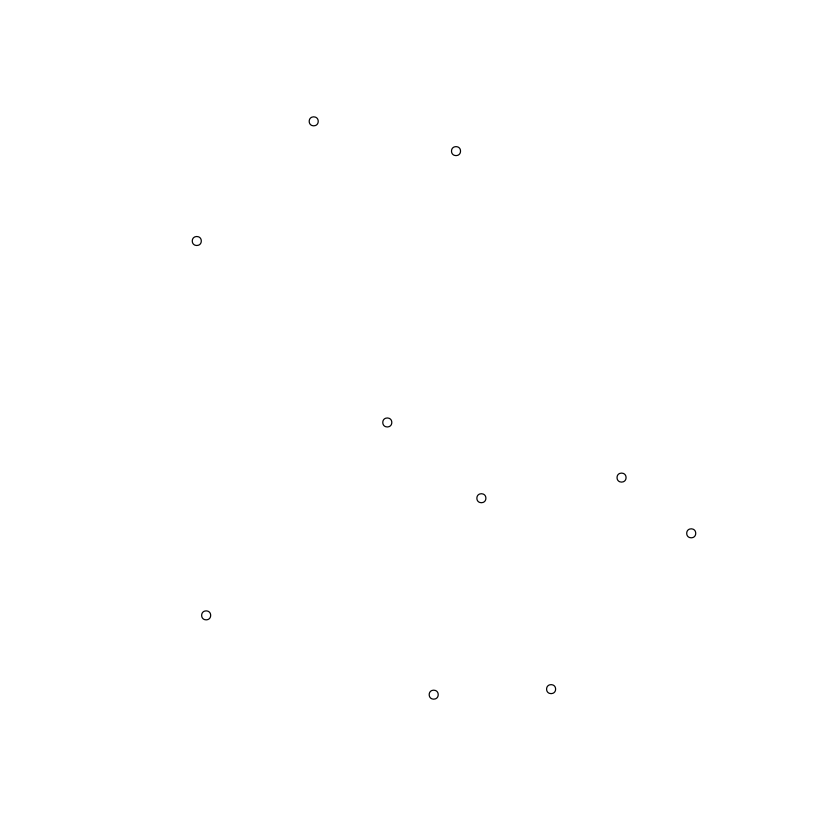

In [4]:
plot(geo_cities_sf$geometry)

In [5]:
# Converti in oggetto sf
geo_cities_sf <- st_as_sf(geo_cities, coords = c("long", "lat"), crs = 4326)

## reverse geocoding

tidygeocoder non sviluppa il reverse geocoding, quindi serve usare un altra libreria come [revgeo](https://github.com/mhudecheck/revgeo)

In [26]:
install.packages("revgeo")
library('revgeo')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [6]:
# Prendi il terzo punto
point <- geo_cities_sf[3, ]  # Riga 3

# Ottieni la geometria in formato WKT
point_wkt <- st_as_text(point$geometry)
print(point_wkt)


[1] "POINT (11.11907 46.06667)"


In [7]:

# Ottieni le coordinate x e y
point_coords <- st_coordinates(point)
latlon <- paste(point_coords[2], point_coords[1], sep = ",")


In [8]:
latlon

[1] "46.0666665,11.1190676"

In [9]:

# Esegui la geocodifica inversa
location <- revgeo(
  long = point_coords[1],
  lat = point_coords[2],
  provider = "photon",  # Utilizza OpenStreetMap
  output = "frame"
)


[1] "Getting geocode data from Photon: http://photon.komoot.de/reverse?lon=11.1190676&lat=46.0666665"


# Visualizza i risultati
print(location)

## Suggerimenti per una buona geocodifica
maggiori dettagli si aggiungono e maggiore sarà la possibilità di avere buoni risultati

In [10]:
# Definisci l'indirizzo da geocodificare
q <- data.frame(address = "Via Verdi, 26")

# Esegui la geocodifica utilizzando il provider ArcGIS
point <- geocode(q, address = address, method = 'arcgis')

Passing 1 address to the ArcGIS single address geocoder

Query completed in: 0.2 seconds



In [11]:
point_sf <- st_as_sf(point, coords = c("long", "lat"), crs = 4326)

In [12]:
# Crea una mappa con leaflet
mappa_leaflet <- leaflet(data = point_sf) %>%
  addTiles() %>%
  addCircleMarkers(
    color = "green",
    radius = 10,
    popup = ~address
  )


In [13]:
mappa_leaflet

HTML widgets cannot be represented in plain text (need html)

In [14]:
# Definisci l'indirizzo da geocodificare
q <- data.frame(address = "Via Verdi, 26, Trento")

# Esegui la geocodifica utilizzando il provider ArcGIS
point <- geocode(q, address = address, method = 'arcgis')
point_sf_arcgis <- st_as_sf(point, coords = c("long", "lat"), crs = 4326)
# Crea una mappa con leaflet
mappa_leaflet_arcgis <- leaflet(data = point_sf_arcgis) %>%
  addTiles() %>%
  addCircleMarkers(
    color = "green",
    radius = 10,
    popup = ~address
  )

Passing 1 address to the ArcGIS single address geocoder

Query completed in: 0.1 seconds



In [15]:
mappa_leaflet_arcgis

HTML widgets cannot be represented in plain text (need html)

In [16]:
# Definisci l'indirizzo da geocodificare
q <- data.frame(address = "Via Verdi, 26, Trento")

# Esegui la geocodifica utilizzando il provider ArcGIS
point <- geocode(q, address = address, method = 'osm')
point_sf_osm <- st_as_sf(point, coords = c("long", "lat"), crs = 4326)
# Crea una mappa con leaflet
mappa_leaflet_osm <- leaflet(data = point_sf) %>%
  addTiles() %>%
  addCircleMarkers(
    color = "green",
    radius = 10,
    popup = ~address
  )

Passing 1 address to the Nominatim single address geocoder

Query completed in: 1 seconds



In [17]:
mappa_leaflet_osm

HTML widgets cannot be represented in plain text (need html)

calcolo della distanza tra i due punti


In [18]:
# Trasformazione delle coordinate in EPSG:32632
point_arcgis_m <- st_transform(point_sf_arcgis, crs = 32632)
point_sf_osm <- st_transform(point_sf_osm, crs = 32632)

# Calcolo della distanza
distance <- st_distance(point_arcgis_m, point_sf_osm)[1]

In [19]:
distance

26.28189 [m]

## **Sommario**

- il geocoding è, prima di tutto, un problema di NLP
- i servizi di geocoding services cercano di normalizzare la query per identificare l'oggetto che si sta cercando
- maggiori informazioni di ordine geografico si danno e maggiore è la probabilità di risultato valido da parte del geocoder
- è molto difficile che i geocoder abbiamo una banca dati costantemente aggiornata
- molti geocoder, quando non riesco a trovare un valore, restituiscono un valore desunto da interpolazione
- l'accuratezza dipenda da cosa si sta cercando
- un geocoder cerca sempre di dare una risposta<br/>&nbsp;un ottimo geocoder quindi restituisce anche un intervallo di confidenza di bontà di quello che ha trovato

# OGC Services
![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/ogc_services.png)

---
## Catalog Service for the Web

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/geocatalog_pat.png)

---

https://siat.provincia.tn.it/geonetwork/srv/eng/catalog.search


#### end-point di geodati.gov.it

http://geodati.gov.it/RNDT/csw

## l'evoluzione è OGG API

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/ogc_api.png)

visita
- [https://ogcapi.ogc.org/](https://ogcapi.ogc.org/)
- [OGC API Features](https://github.com/INSPIRE-MIF/gp-ogc-api-features)
- [learning OGC API features](http://opengeospatial.github.io/e-learning/ogcapi-features/text/basic-main.html)
- [OGC API SensorThings](https://github.com/INSPIRE-MIF/gp-ogc-sensorthings-api)
- [OGC API Records](https://github.com/INSPIRE-MIF/gp-ogc-api-records)

esempi
- [https://geoe3platform.eu/geoe3](https://geoe3platform.eu/geoe3)
- [https://geonovum.github.io/wfs3-experiments/docs/Clients.html](https://geonovum.github.io/wfs3-experiments/docs/Clients.html)

# OpenStreetMap è un bene comune

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/osm.png)

## dati RAW
OSM XML
![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/osmdata1.png)

## OverPass API
![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/overpassturbo.png)


* [http://overpass-turbo.eu/](http://overpass-turbo.eu/)
* [https://overpass-ultra.trailsta.sh/](https://overpass-ultra.trailsta.sh/)

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/export_hotosm.png)


[https://export.hotosm.org/en/v3/exports/91f6bf76-f310-46fe-a6dd-8f230489d1aa](https://export.hotosm.org/en/v3/exports/91f6bf76-f310-46fe-a6dd-8f230489d1aa)

Per le regioni, province e comuni italiani, Wikimedia Italia ha messo a disposizione questa risorsa

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/osm_estratti.png)

[https://osmit-estratti.wmcloud.org/](https://osmit-estratti.wmcloud.org/)

Eg.
[Venezia](https://osmit-estratti.wmcloud.org/output/pbf/comuni/027042_Venezia.osm.pbf)

In [20]:
#install.packages("osmdata")

In [21]:
library(osmdata)
library(ggplot2)

Data (c) OpenStreetMap contributors, ODbL 1.0. https://www.openstreetmap.org/copyright



In [22]:
isola_venezia = "Venezia, Lido, Venice, Venezia, Veneto, Italy"

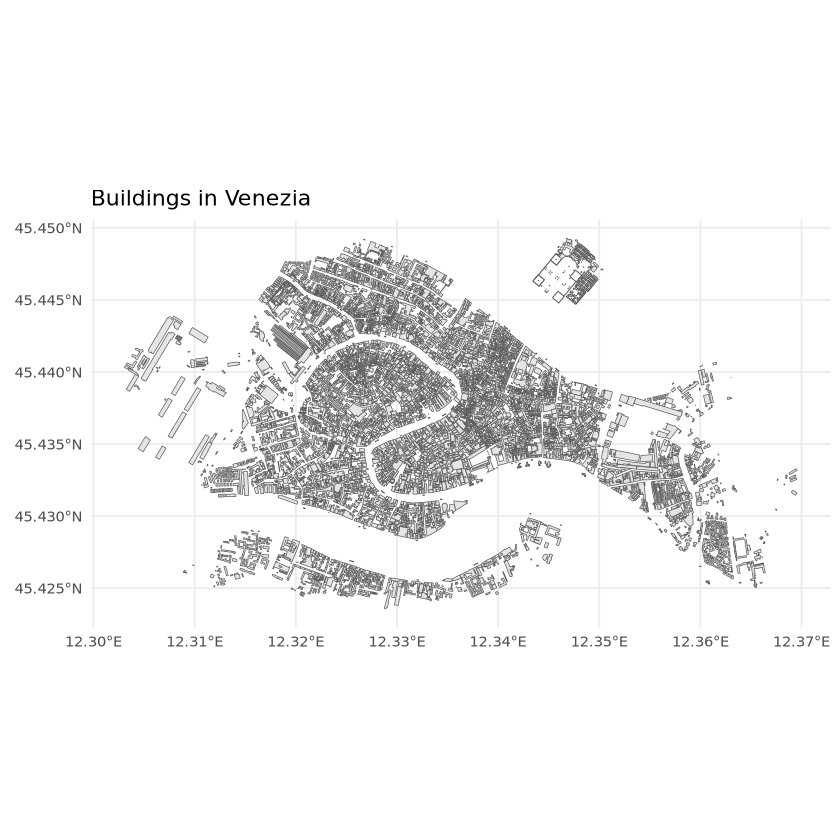

In [23]:

# Ottenere edifici (buildings)
buildings <- osmdata_sf(add_osm_feature(opq(isola_venezia), key = "building"))
buildings_sf <- buildings$osm_polygons
ggplot(data = buildings_sf) +
  geom_sf() +
  theme_minimal() +
  ggtitle("Buildings in Venezia")


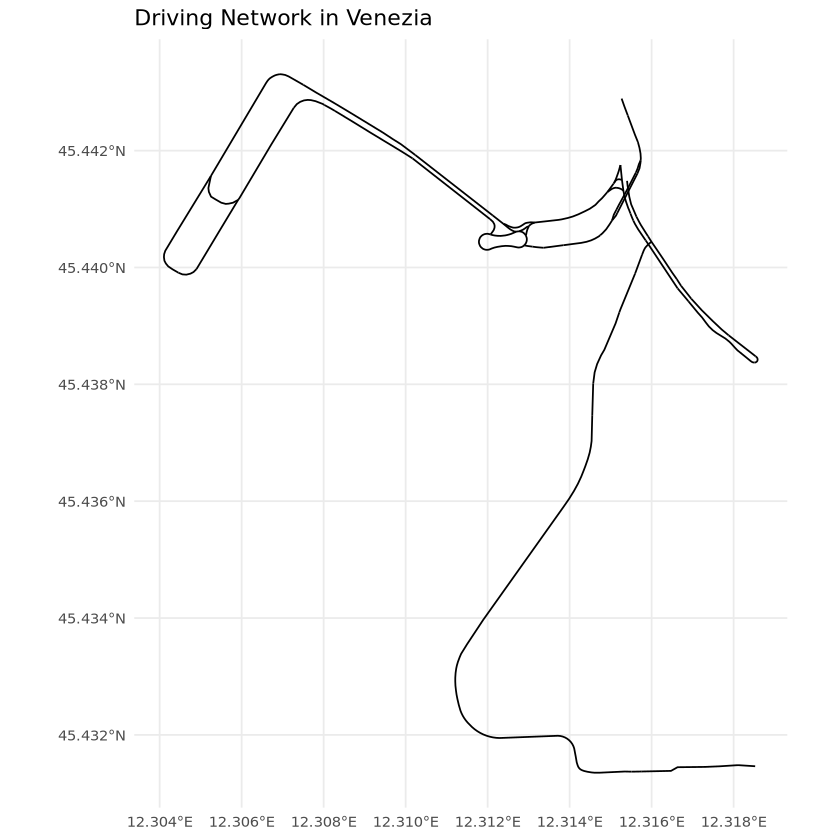

In [30]:

# Rete stradale (driving network)
drive_net <- osmdata_sf(add_osm_feature(opq(isola_venezia), key = "highway", value = c("primary", "secondary", "tertiary","unclassified")))
drive_net_sf <- drive_net$osm_lines
ggplot(data = drive_net_sf) +
  geom_sf(color = "black") +
  theme_minimal() +
  ggtitle("Driving Network in Venezia")


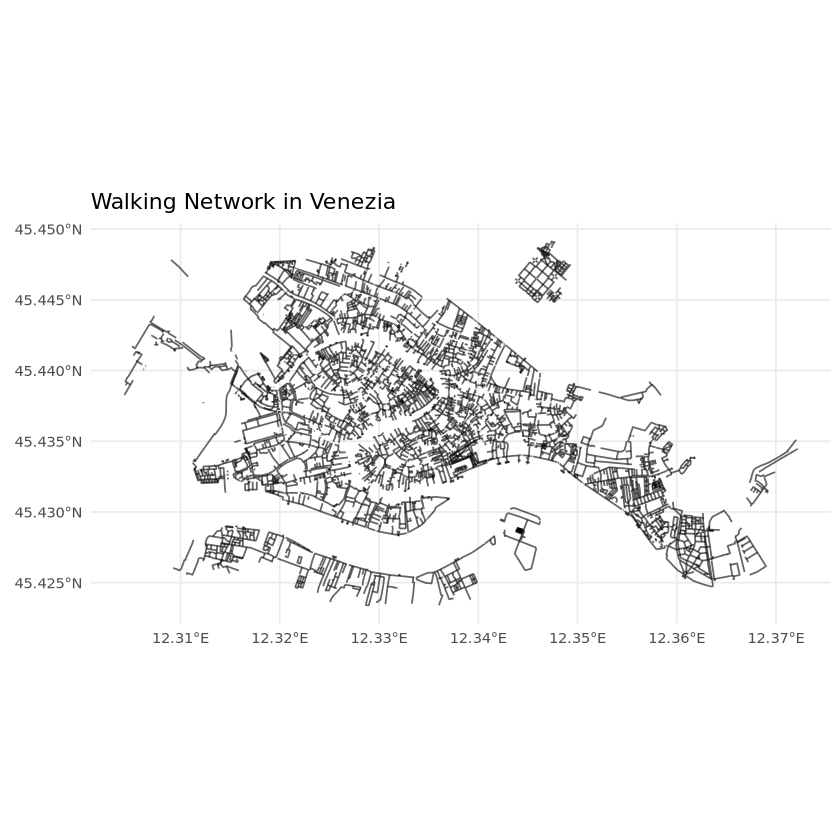

In [29]:

# Rete pedonale (walking network)
walk_net <- osmdata_sf(add_osm_feature(opq(isola_venezia), key = "highway", value = c("footway", "pedestrian", "path")))
walk_net_sf <- walk_net$osm_lines
ggplot(data = walk_net_sf) +
  geom_sf(color = "black", alpha = 0.6, size = 0.7) +
  theme_minimal() +
  ggtitle("Walking Network in Venezia")

